프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기

In [2]:
import os
import matplotlib.image as img
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

프로젝트 1-1.

1. 높은 해상도 이미지 준비

(1365, 2048, 3)


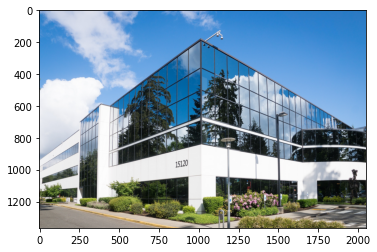

In [4]:
image_path = '/content/drive/MyDrive/Colab Notebooks/E-16/building.jpg'
fig = img.imread(image_path)
plt.imshow(fig)
print(fig.shape) 

2. 저해상도 이미지로 변경 : bicubic interpolation 적용 --> 가로, 세로 픽셀 수 1/4로 줄이기

Text(0.5, 1.0, 'Bicubic//4')

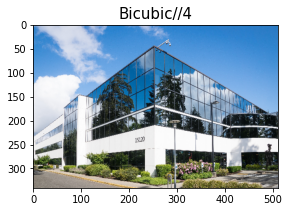

In [12]:
rs_image = cv2.resize(fig, dsize=(2048//4, 1365//4), interpolation=cv2.INTER_CUBIC)

image = rs_image
title = "Bicubic//4"

plt.figure(figsize=(16, 3))
plt.imshow(image)
plt.title(title, fontsize=15)

3. resize로 저해상도로 만든 이미지를 입력으로 하여 고해상도 이미지 생성

In [6]:
import tensorflow as tf
import os

model_file = '/content/drive/MyDrive/Colab Notebooks/E-16/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [9]:
# srgan 적용해서 고해상도 이미지 생성하기

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_hr = apply_srgan(rs_image)

4. 2에서 만든 이미지에 bicubic interpolation으로 가로, 세로 픽셀 수 다시 4배로 늘리기

Text(0.5, 1.0, 'Bicubic*4')

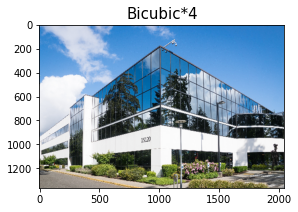

In [13]:
bicubic = cv2.resize(rs_image, dsize=(2048//4*4, 1365//4*4), interpolation=cv2.INTER_CUBIC)

image = bicubic
title = "Bicubic*4"

plt.figure(figsize=(16, 3))
plt.imshow(image)
plt.title(title, fontsize=15)

5. [Bicubic, SRGAN, 원래 고해상도 이미지] 나란히 시각화

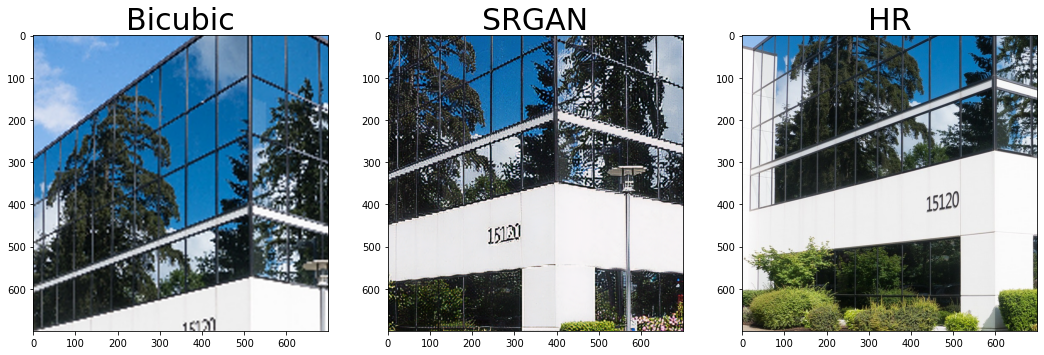

In [45]:
bicubic_cr = tf.image.random_crop(bicubic, size =[700,700,3])
srgan_hr_cr = tf.image.random_crop(srgan_hr, size =[700,700,3])
fig_cr = tf.image.random_crop(fig, size =[700,700,3])

images = [bicubic_cr, srgan_hr_cr, fig_cr]
labels = ["Bicubic", "SRGAN", "HR"]

plt.figure(figsize=(18,18))
for i in range(3):
    plt.subplot(1,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

--> SRGAN을 이용해 고해상도 이미지 생성 완료

프로젝트 1-2.

1. 낮은 해상도 이미지 준비

(416, 640, 3)


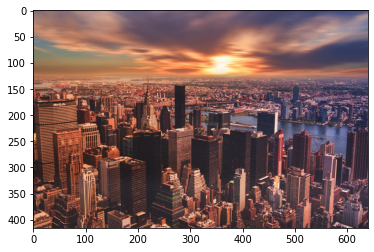

In [46]:
image_path = '/content/drive/MyDrive/Colab Notebooks/E-16/low_b.jpg'
fig = img.imread(image_path)
plt.imshow(fig)
print(fig.shape) 

2. 낮은 해상도 이미지를 입력으로 SRGAN 이용해 고해상도 이미지 생성

In [48]:
# srgan 적용해서 고해상도 이미지 생성하기

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_hr = apply_srgan(fig)

3. 원본 이미지에 bicubic interpolation 이용해 가로, 세로 픽셀 수 4배로 늘리기

Text(0.5, 1.0, 'Bicubic*4')

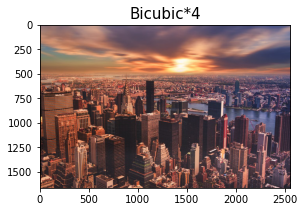

In [51]:
bicubic = cv2.resize(fig, dsize=(640*4, 416*4), interpolation=cv2.INTER_CUBIC)

image = bicubic
title = "Bicubic*4"

plt.figure(figsize=(16, 3))
plt.imshow(image)
plt.title(title, fontsize=15)

4. [Bicubic, SRGAN] 나란히 시각화

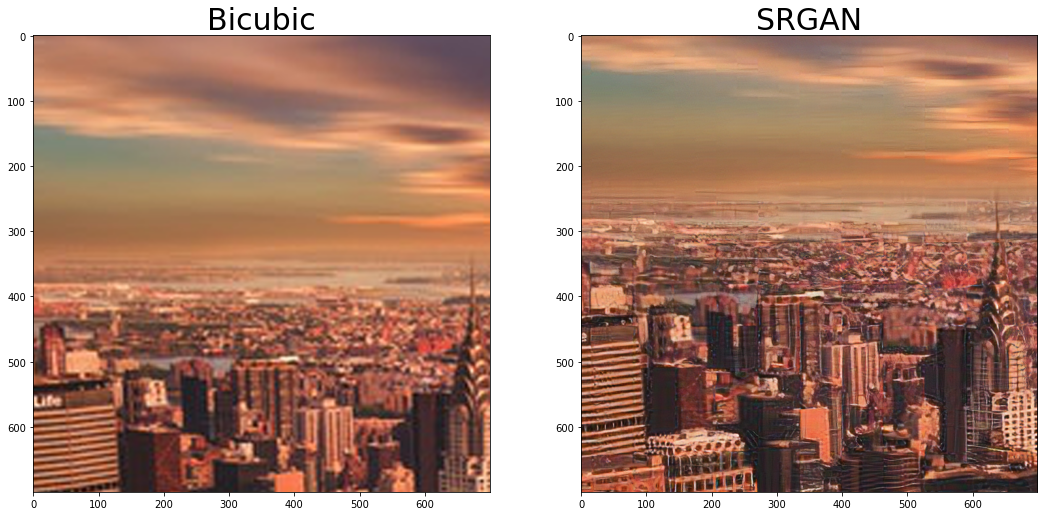

In [68]:
bicubic_cr = tf.image.random_crop(bicubic, size =[700,700,3])
srgan_hr_cr = tf.image.random_crop(srgan_hr, size =[700,700,3])

images = [bicubic_cr, srgan_hr_cr]
labels = ["Bicubic", "SRGAN"]

plt.figure(figsize=(18,18))
for i in range(2):
    plt.subplot(1,2,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

--> SRGAN을 이용해 고해상도 이미지 생성 완료

[회고]

- SRGAN 노드에 나온 프로젝트는 학습과정을 그대로 거친 다음, 바로 해결하기 어려운 편이었다. 기존에 해상도와 픽셀에 관한 사전지식이 있었기 때문에 원리를 이해하는 것은 수월했지만, 이론을 실제로 구현하는 과정이 어려웠다.
- Super resolution은 앞으로 미래 산업의 다양한 분야에 유용한 기술이 될 것이라는 생각이 들었다.
- SR 기술이 가진 문제는 데이터 기반으로 불명확한 픽셀을 새로 채워나가는 것이기 때문에 학습된 데이터에 따라서 아주 다른 결과가 나올 수 있다는 것이다.
- 저해상도 이미지, 영상을 고해상도로 변환하는 과정에 대한 이해는 확실히 되었다.
- 모델에 대한 이해와 실제 적용하는 방법에 대한 공부가 훨씬 많이 필요하다는 생각이 들었다.